<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.org/regression/"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46
# Boston is regression dataset.
# The values in "medv" columns are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 "Parameter setting"  for all regression models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [5]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', train_size=0.7, silent=True)

,Description,Value
0,session_id,3634
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.4 "Run and Compare" the model performance**
---

In [6]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1515,9.9619,3.0763,0.8845,0.1360,0.1065,0.444
gbr,Gradient Boosting Regressor,2.4208,13.4011,3.4990,0.8461,0.1583,0.1219,0.090
lightgbm,Light Gradient Boosting Machine,2.5057,14.9758,3.6919,0.8299,0.1702,0.1272,0.083
rf,Random Forest Regressor,2.4926,15.8657,3.7858,0.8203,0.1621,0.1234,0.507
ada,AdaBoost Regressor,2.8576,17.2576,3.9664,0.8068,0.1818,0.1491,0.093
ridge,Ridge Regression,3.4190,23.7818,4.7581,0.7322,0.2578,0.1699,0.013
lr,Linear Regression,3.4465,23.8026,4.7732,0.7301,0.2573,0.1709,0.284
br,Bayesian Ridge,3.4311,24.1278,4.7808,0.7297,0.2552,0.1703,0.014
lasso,Lasso Regression,3.8327,29.4899,5.3174,0.6688,0.2686,0.1805,0.014
en,Elastic Net,3.8619,29.9204,5.3689,0.6622,0.2744,0.1806,0.014


---
### **1.5 "Three line of code" for model comparison for "Insurance" dataset**
---



In [7]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2601.7820,2.144432e+07,4608.7011,0.8424,0.4405,0.3146,0.085
rf,Random Forest Regressor,2620.7501,2.261867e+07,4732.5557,0.8349,0.4605,0.3215,0.535
lightgbm,Light Gradient Boosting Machine,2847.1392,2.335252e+07,4812.5386,0.8290,0.5256,0.3581,0.051
et,Extra Trees Regressor,2637.3795,2.555299e+07,5027.3247,0.8123,0.4803,0.3194,0.502
ada,AdaBoost Regressor,4116.2504,2.657858e+07,5146.7267,0.8017,0.6065,0.6828,0.034
llar,Lasso Least Angle Regression,4134.2924,3.611834e+07,5990.2377,0.7386,0.5709,0.4042,0.016
ridge,Ridge Regression,4153.0902,3.614210e+07,5992.0179,0.7384,0.6026,0.4074,0.013
lasso,Lasso Regression,4140.1589,3.613586e+07,5991.7305,0.7383,0.6127,0.4053,0.016
lar,Least Angle Regression,4140.7885,3.614455e+07,5992.3817,0.7383,0.6089,0.4053,0.017
br,Bayesian Ridge,4150.2067,3.614318e+07,5992.1643,0.7383,0.6169,0.4069,0.015


---
### **1.6 "Three line of code" for model comparison for "House" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.768268e+04,8.639367e+08,2.861498e+04,8.607000e-01,0.1427,0.1039,0.661
rf,Random Forest Regressor,1.857535e+04,9.215902e+08,2.998576e+04,8.535000e-01,0.1569,0.1116,2.198
lightgbm,Light Gradient Boosting Machine,1.805410e+04,9.166465e+08,2.967682e+04,8.528000e-01,0.1503,0.1064,0.225
et,Extra Trees Regressor,2.196064e+04,1.351525e+09,3.563218e+04,7.968000e-01,0.1781,0.1280,2.493
omp,Orthogonal Matching Pursuit,1.871589e+04,1.214597e+09,3.175498e+04,7.904000e-01,0.1617,0.1125,0.038
ada,AdaBoost Regressor,2.426340e+04,1.423020e+09,3.686163e+04,7.679000e-01,0.2018,0.1577,0.436
ridge,Ridge Regression,1.977228e+04,1.438091e+09,3.395868e+04,7.532000e-01,0.1791,0.1200,0.064
lasso,Lasso Regression,2.047957e+04,1.502620e+09,3.452306e+04,7.394000e-01,0.2114,0.1259,0.191
en,Elastic Net,2.117490e+04,1.668428e+09,3.751594e+04,7.174000e-01,0.1716,0.1258,0.221
lr,Linear Regression,2.253572e+04,1.656527e+09,3.732541e+04,7.139000e-01,0.2652,0.1411,0.058


---
# **2. Regression: working with user dataset**
---
#### **2.1 Uploading "user file" from user system**

In [9]:
from google.colab import files
#files.upload()                     # Uncomment this line

#### **2.2 "Read" the uploaded file**

In [10]:
import pandas as pd
#myDataSet = pd.read_csv('Sample1 - Regression data.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

#### **2.3 "Compare" the model performance**

In [11]:
from pycaret.datasets import get_data
from pycaret.regression import *

#s = setup(data = myDataSet, target='RMSD', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

#### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [12]:
from pycaret.datasets import get_data
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [13]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1125,9.7538,3.0298,0.8757,0.1366,0.1082,0.089
et,Extra Trees Regressor,2.2004,11.6679,3.2976,0.8563,0.1403,0.1090,0.445
rf,Random Forest Regressor,2.2914,12.5418,3.4252,0.8420,0.1501,0.1166,0.503
lightgbm,Light Gradient Boosting Machine,2.4118,13.8958,3.6080,0.8359,0.1559,0.1210,0.038
ada,AdaBoost Regressor,2.6630,14.3693,3.6331,0.8144,0.1725,0.1460,0.096
knn,K Neighbors Regressor,2.8435,19.9717,4.3784,0.7576,0.1698,0.1296,0.061
dt,Decision Tree Regressor,3.2189,24.8422,4.7528,0.6945,0.2127,0.1642,0.016
br,Bayesian Ridge,3.4460,26.0991,5.0026,0.6788,0.2399,0.1721,0.014
ridge,Ridge Regression,3.4683,26.1143,5.0110,0.6783,0.2418,0.1726,0.013
lr,Linear Regression,3.4799,26.1974,5.0215,0.6772,0.2428,0.1730,0.014


### **3.2 Model performance using "Feature Selection"**

In [14]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1277,9.0241,2.9556,0.8921,0.1360,0.1078,0.092
et,Extra Trees Regressor,2.1750,10.0186,3.0516,0.8843,0.1351,0.1071,0.443
rf,Random Forest Regressor,2.3000,11.3222,3.2985,0.8669,0.1469,0.1172,0.503
lightgbm,Light Gradient Boosting Machine,2.4542,13.3255,3.6150,0.8451,0.1603,0.1234,0.037
ada,AdaBoost Regressor,2.6343,12.5652,3.5055,0.8438,0.1678,0.1394,0.092
lr,Linear Regression,3.3221,22.4049,4.6325,0.7480,0.2521,0.1701,0.013
ridge,Ridge Regression,3.3169,22.4553,4.6384,0.7471,0.2435,0.1709,0.013
br,Bayesian Ridge,3.3330,22.8488,4.6809,0.7423,0.2397,0.1721,0.015
dt,Decision Tree Regressor,3.0153,20.6744,4.3699,0.7422,0.1930,0.1513,0.018
lar,Least Angle Regression,3.4178,23.5164,4.7592,0.7264,0.2603,0.1783,0.017


### **3.3 Model performance using "Outlier Removal"**

In [15]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0642,8.0473,2.7873,0.8774,0.1353,0.1077,0.089
et,Extra Trees Regressor,2.0779,9.1817,2.9628,0.8715,0.1279,0.1028,0.438
rf,Random Forest Regressor,2.1583,9.6985,3.0561,0.8611,0.1337,0.1063,0.502
lightgbm,Light Gradient Boosting Machine,2.3486,11.2777,3.2509,0.8519,0.1419,0.1146,0.036
ada,AdaBoost Regressor,2.7648,13.3573,3.6112,0.8085,0.1742,0.1483,0.095
dt,Decision Tree Regressor,2.9122,19.8251,4.2525,0.7186,0.1824,0.1438,0.017
lr,Linear Regression,3.5233,25.9703,4.9182,0.6682,0.2725,0.1764,0.013
ridge,Ridge Regression,3.5022,25.9922,4.9213,0.6682,0.2860,0.1761,0.013
br,Bayesian Ridge,3.5189,26.4313,4.9665,0.6610,0.2867,0.1779,0.015
huber,Huber Regressor,3.7145,32.3861,5.2993,0.6165,0.2973,0.1891,0.044


---
### **3.4 Model performance using "Transformation"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1189,9.8917,3.0774,0.8613,0.1374,0.1044,0.450
gbr,Gradient Boosting Regressor,2.2373,10.1248,3.1317,0.8608,0.1484,0.1153,0.089
rf,Random Forest Regressor,2.3251,12.1893,3.4331,0.8303,0.1521,0.1168,0.500
lightgbm,Light Gradient Boosting Machine,2.4356,13.0130,3.5479,0.8213,0.1570,0.1198,0.038
ada,AdaBoost Regressor,2.8978,14.5376,3.7620,0.7991,0.1761,0.1510,0.091
knn,K Neighbors Regressor,2.8116,17.3289,4.0924,0.7702,0.1673,0.1312,0.060
br,Bayesian Ridge,3.3582,21.1819,4.5626,0.7132,0.2233,0.1686,0.014
ridge,Ridge Regression,3.3970,21.3430,4.5773,0.7110,0.2248,0.1701,0.013
lr,Linear Regression,3.4147,21.4586,4.5886,0.7095,0.2256,0.1709,0.015
lar,Least Angle Regression,3.4147,21.4586,4.5886,0.7095,0.2256,0.1709,0.016


---
### **3.5 Model performance using "PCA"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.9071,53.5858,7.2306,0.3677,0.2832,0.2413,0.397
rf,Random Forest Regressor,5.1192,55.9780,7.4207,0.3359,0.2919,0.2482,0.445
gbr,Gradient Boosting Regressor,5.1591,56.7665,7.4460,0.3347,0.2939,0.2518,0.056
lightgbm,Light Gradient Boosting Machine,5.4317,58.7064,7.5654,0.3145,0.3001,0.2609,0.032
knn,K Neighbors Regressor,5.4820,60.8840,7.7274,0.2953,0.3033,0.2633,0.060
lr,Linear Regression,5.7426,67.6492,8.0863,0.2349,0.3214,0.2765,0.014
ridge,Ridge Regression,5.7426,67.6492,8.0863,0.2349,0.3214,0.2765,0.013
en,Elastic Net,5.7444,67.6506,8.0866,0.2349,0.3214,0.2766,0.015
lar,Least Angle Regression,5.7426,67.6492,8.0863,0.2349,0.3214,0.2765,0.013
lasso,Lasso Regression,5.7460,67.6530,8.0870,0.2348,0.3215,0.2767,0.015


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [18]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1688,9.4825,3.0048,0.8586,0.1419,0.1131,0.089
rf,Random Forest Regressor,2.2174,10.0134,3.0732,0.8556,0.1409,0.1138,0.511
et,Extra Trees Regressor,2.1977,10.9103,3.1048,0.8481,0.1387,0.1104,0.431
lightgbm,Light Gradient Boosting Machine,2.5608,14.6112,3.6660,0.7799,0.1597,0.1267,0.037
ada,AdaBoost Regressor,2.7721,15.7598,3.8045,0.7729,0.1797,0.1475,0.091
knn,K Neighbors Regressor,2.8378,19.3902,4.2538,0.7387,0.1729,0.1328,0.061
br,Bayesian Ridge,3.2469,22.6947,4.6143,0.6701,0.2429,0.1646,0.014
ridge,Ridge Regression,3.2804,22.6825,4.6215,0.6677,0.2432,0.1661,0.013
huber,Huber Regressor,3.0855,24.3530,4.7035,0.6675,0.2440,0.1513,0.030
lar,Least Angle Regression,3.3021,22.7650,4.6333,0.6656,0.2435,0.1670,0.015


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [19]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1889,9.5049,2.9948,0.8704,0.1427,0.1132,0.088
et,Extra Trees Regressor,2.1745,9.8964,3.0685,0.8620,0.1415,0.1102,0.445
rf,Random Forest Regressor,2.2706,10.5754,3.1696,0.8555,0.1482,0.1161,0.502
lightgbm,Light Gradient Boosting Machine,2.3264,10.8765,3.2443,0.8485,0.1488,0.1186,0.037
ada,AdaBoost Regressor,2.6666,13.2482,3.5826,0.8129,0.1669,0.1397,0.092
br,Bayesian Ridge,3.1542,18.2906,4.2233,0.7439,0.2023,0.1620,0.013
ridge,Ridge Regression,3.1856,18.3356,4.2331,0.7418,0.2024,0.1634,0.014
lr,Linear Regression,3.2093,18.4439,4.2472,0.7396,0.2026,0.1644,0.013
knn,K Neighbors Regressor,2.9549,18.0797,4.1826,0.7384,0.1790,0.1443,0.063
huber,Huber Regressor,3.0989,19.2045,4.3056,0.7342,0.2131,0.1576,0.030


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.org/regression/"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [20]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2010,8.8694,2.9782,0.9094,0.1671,0.1329
1,2.5605,10.8270,3.2904,0.8380,0.1474,0.1253
2,1.8571,5.6325,2.3733,0.9441,0.0950,0.0844
3,2.5166,14.9826,3.8707,0.8845,0.1585,0.1133
4,3.0607,21.6984,4.6582,0.7257,0.1828,0.1400
5,1.9933,7.6991,2.7747,0.8161,0.1217,0.0961
6,2.5564,10.3658,3.2196,0.8795,0.1938,0.1719
7,2.9419,28.7073,5.3579,0.6935,0.2110,0.1546
8,2.7551,11.8966,3.4492,0.8475,0.1682,0.1472
9,1.8535,6.9729,2.6406,0.8894,0.1418,0.1023


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.org/regression/#create-model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.124000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.255000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.123001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.545001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.101001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,25.433000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.888000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,24.016000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.925000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.996000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

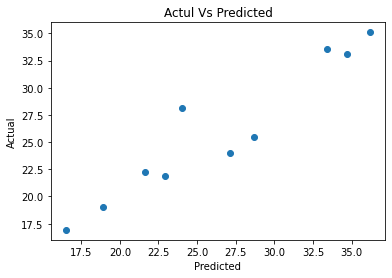

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.7 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.8 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **4.9 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
#### **4.10.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

#### **4.10.2 Load the "Model"**

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

#### **4.10.3 Make the prediction on "new unseen dataSet"**

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.124000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.255000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.123001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.545001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.101001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,25.433000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.888000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,24.016000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.925000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.996000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2010,8.8694,2.9782,0.9094,0.1671,0.1329
1,2.5605,10.8270,3.2904,0.8380,0.1474,0.1253
2,1.8571,5.6325,2.3733,0.9441,0.0950,0.0844
3,2.5166,14.9826,3.8707,0.8845,0.1585,0.1133
4,3.0607,21.6984,4.6582,0.7257,0.1828,0.1400
5,1.9933,7.6991,2.7747,0.8161,0.1217,0.0961
6,2.5564,10.3658,3.2196,0.8795,0.1938,0.1719
7,2.9419,28.7073,5.3579,0.6935,0.2110,0.1546
8,2.7551,11.8966,3.4492,0.8475,0.1682,0.1472
9,1.8535,6.9729,2.6406,0.8894,0.1418,0.1023


---
### **5.2 Plot the "error"**
---

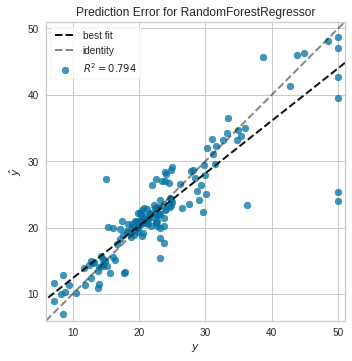

In [32]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

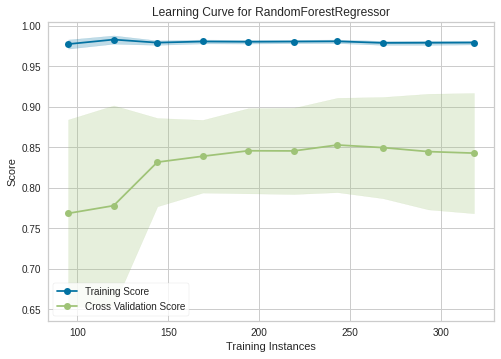

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

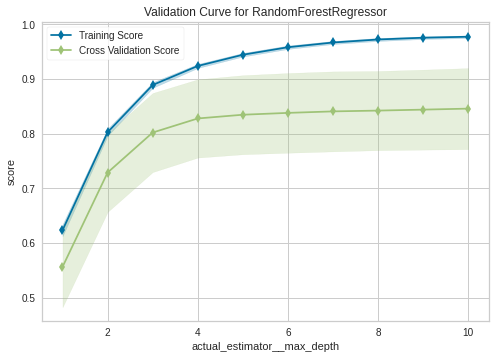

In [34]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [35]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#plot-model"> Click Here </a>**

---
# **6. Feature Importance**
---
#### **6.1 Feature Importance using "Random Forest"**


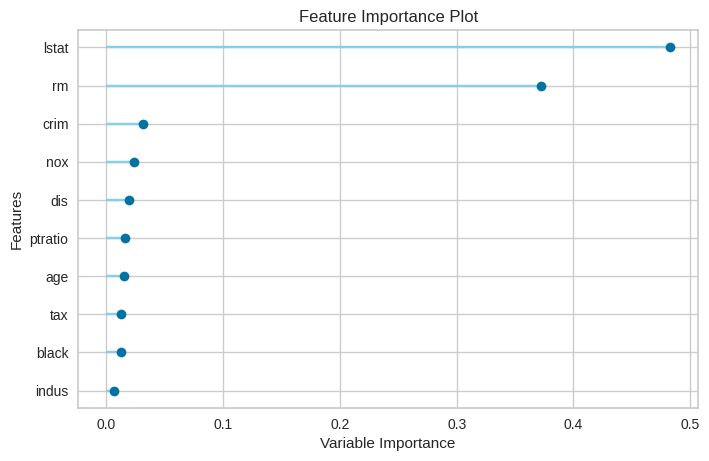

In [36]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

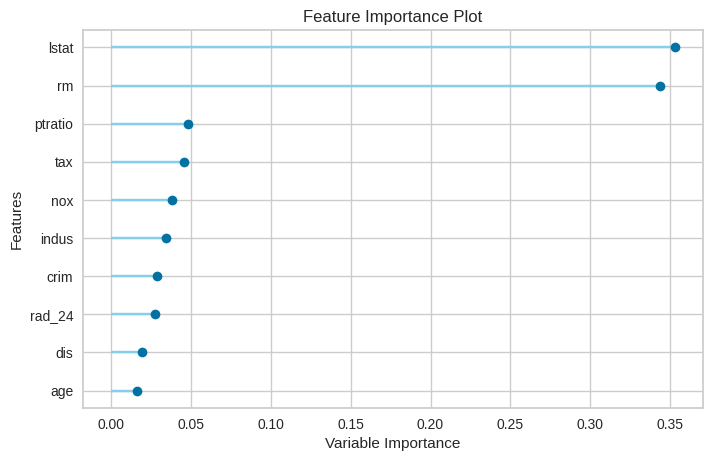

In [37]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

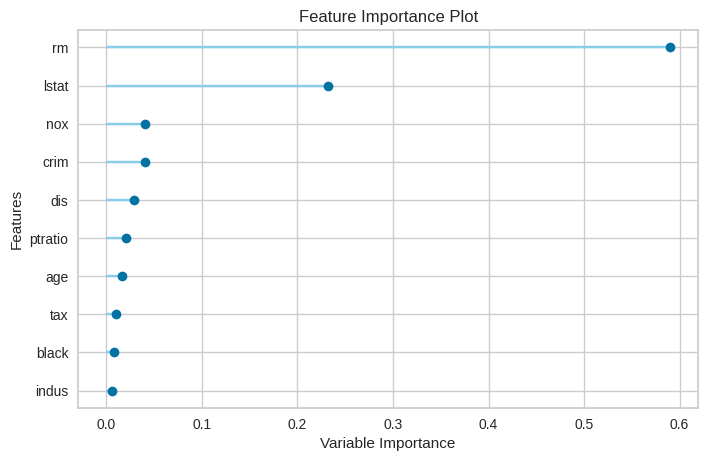

In [38]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [39]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1778,16.7317,4.0904,0.8291,0.2255,0.1969
1,3.4806,22.7481,4.7695,0.6596,0.1985,0.1649
2,2.6361,12.2469,3.4996,0.8785,0.1525,0.1258
3,2.7306,16.0047,4.0006,0.8766,0.1971,0.1275
4,3.3429,30.7274,5.5432,0.6115,0.2151,0.1534
5,3.2686,19.0611,4.3659,0.5447,0.2411,0.1658
6,3.4886,20.0797,4.4810,0.7665,0.2566,0.2197
7,4.0429,42.3906,6.5108,0.5475,0.2520,0.1983
8,2.9914,16.9934,4.1223,0.7822,0.2392,0.1537
9,3.3571,18.8586,4.3426,0.7010,0.2332,0.1790


#### **Get the "parameters" of Decision Tree**

In [40]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [41]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5917,9.5410,3.0889,0.9026,0.1827,0.1595
1,3.1252,18.2785,4.2753,0.7265,0.1769,0.1452
2,2.3187,10.1337,3.1833,0.8994,0.1582,0.1123
3,3.5122,24.1985,4.9192,0.8135,0.2159,0.1699
4,3.3890,32.8371,5.7304,0.5848,0.1956,0.1387
5,2.5085,10.4755,3.2366,0.7498,0.1529,0.1244
6,3.3112,18.9289,4.3507,0.7799,0.2455,0.2015
7,3.6020,40.7428,6.3830,0.5651,0.2564,0.1958
8,3.5377,28.8117,5.3677,0.6307,0.2428,0.1871
9,2.3402,11.6579,3.4144,0.8151,0.1639,0.1178


#### **Get the "tuned parameters" of Decision Tree**

In [42]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,7
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,4
min_samples_split,5
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#tune-model"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.org/regression#deploy-model">Click Here</a>**
